In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: wordcloud in c:\users\dr oluwaseun\anaconda3\lib\site-packages (1.8.2.2)



IMPORTING THE NEEDED LIBRARY FOR OUR ANALYSIS

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Dr
[nltk_data]     Oluwaseun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

IMPORTING THE DATASET FOR THE SENTIMENT ANALYSIS

In [5]:
df = pd.read_csv('finalhealthuk2.csv')

EXPLORATORY ANALYSIS OF DATASET

In [6]:
df.head()

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count
0,0,2022-11-24 01:22:50+00:00,https://twitter.com/ColinMendelsohn/status/159...,ColinMendelsohn,Twitter Web App,"Sydney, Australia",7⃣ things you need to know about quitting smok...,26,13,1,0
1,1,2022-11-21 16:48:00+00:00,https://twitter.com/RefillStationUK/status/159...,RefillStationUK,Buffer,UK,This is why we'll never stop hammering this ho...,0,0,0,0
2,2,2022-11-19 16:45:30+00:00,https://twitter.com/WeVapeUK/status/1594008980...,WeVapeUK,Twitter for iPhone,"England, United Kingdom",#vaping is safer than #smoking https://t.co/mF...,17,10,0,2
3,3,2022-11-17 19:14:55+00:00,https://twitter.com/ColinMendelsohn/status/159...,ColinMendelsohn,Twitter Web App,"Sydney, Australia",The Cochrane review on #vaping to quit smoking...,45,23,2,0
4,4,2022-11-17 11:01:58+00:00,https://twitter.com/VapeDirectUK/status/159319...,VapeDirectUK,Hootsuite Inc.,"Milton Keynes, England",A lot of people think that vaping is confusing...,2,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3173 non-null   int64 
 1   Date           3173 non-null   object
 2   TweetURL       3173 non-null   object
 3   User           3173 non-null   object
 4   Source         3173 non-null   object
 5   Location       2788 non-null   object
 6   Tweet          3173 non-null   object
 7   Likes_Count    3173 non-null   int64 
 8   Retweet_Count  3173 non-null   int64 
 9   Quote_Count    3173 non-null   int64 
 10  Reply_Count    3173 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 272.8+ KB


In [8]:
df.isnull().sum()

Unnamed: 0         0
Date               0
TweetURL           0
User               0
Source             0
Location         385
Tweet              0
Likes_Count        0
Retweet_Count      0
Quote_Count        0
Reply_Count        0
dtype: int64

CHECKING THE COLUMNS

In [10]:
df.columns

Index(['Unnamed: 0', 'Date', 'TweetURL', 'User', 'Source', 'Location', 'Tweet',
       'Likes_Count', 'Retweet_Count', 'Quote_Count', 'Reply_Count'],
      dtype='object')

In [14]:
import datetime
from datetime import date,datetime
df['year'] = pd.DatetimeIndex(df['Date']).year

In [15]:
Year = df['year']
Year

0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
3168    1970
3169    1970
3170    1970
3171    1970
3172    1970
Name: year, Length: 3173, dtype: int64

In [16]:
df['Date'] = Year
df.head()

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,year
0,0,1970,https://twitter.com/ColinMendelsohn/status/159...,ColinMendelsohn,Twitter Web App,"Sydney, Australia",7⃣ things you need to know about quitting smok...,26,13,1,0,1970
1,1,1970,https://twitter.com/RefillStationUK/status/159...,RefillStationUK,Buffer,UK,This is why we'll never stop hammering this ho...,0,0,0,0,1970
2,2,1970,https://twitter.com/WeVapeUK/status/1594008980...,WeVapeUK,Twitter for iPhone,"England, United Kingdom",#vaping is safer than #smoking https://t.co/mF...,17,10,0,2,1970
3,3,1970,https://twitter.com/ColinMendelsohn/status/159...,ColinMendelsohn,Twitter Web App,"Sydney, Australia",The Cochrane review on #vaping to quit smoking...,45,23,2,0,1970
4,4,1970,https://twitter.com/VapeDirectUK/status/159319...,VapeDirectUK,Hootsuite Inc.,"Milton Keynes, England",A lot of people think that vaping is confusing...,2,0,0,0,1970


DROPPING REDUNDANT COLUMNS

In [18]:
text_df = df.drop(['Unnamed: 0', 'TweetURL', 'year'], axis=1)
text_df.head()

,Date,User,Source,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count
0,1970,ColinMendelsohn,Twitter Web App,"Sydney, Australia",7⃣ things you need to know about quitting smok...,26,13,1,0
1,1970,RefillStationUK,Buffer,UK,This is why we'll never stop hammering this ho...,0,0,0,0
2,1970,WeVapeUK,Twitter for iPhone,"England, United Kingdom",#vaping is safer than #smoking https://t.co/mF...,17,10,0,2
3,1970,ColinMendelsohn,Twitter Web App,"Sydney, Australia",The Cochrane review on #vaping to quit smoking...,45,23,2,0
4,1970,VapeDirectUK,Hootsuite Inc.,"Milton Keynes, England",A lot of people think that vaping is confusing...,2,0,0,0


PRINTING THE CONTENT OF THE TWEETS IN ORDER TO START PROCESSING THE TWEETS

In [19]:
print(text_df['Tweet'].iloc[0],"\n")
print(text_df['Tweet'].iloc[1],"\n")
print(text_df['Tweet'].iloc[2],"\n")
print(text_df['Tweet'].iloc[3],"\n")
print(text_df['Tweet'].iloc[4],"\n")

7⃣ things you need to know about quitting smoking and #vaping

By @jhb119 and @switchfinder from the UK Office for Health Improvements and Disparities

https://t.co/ebJ7o8rknt

@Mark_Butler_MP  @MLCGame @RyanPark_Keira 

For example: https://t.co/35YBdHCkuo 

This is why we'll never stop hammering this home. 

1 in 3 smokers are unaware that vaping is better for them than smoking. If you're a smoker and you've not tried vaping as a replacement, it's costing you your health and your hard earned cash

#vaping #vape #vapelife #vapenation https://t.co/zjoNEmTX0c 

#vaping is safer than #smoking https://t.co/mFJ3EwiyxW 

The Cochrane review on #vaping to quit smoking is a game changer according to Professor John Britton, former Chair of the @RCPhysicians Tobacco Advisory Group

Further expert reviews available from the UK Science Media Centre ⤵️
https://t.co/dWKSKe9xQX https://t.co/KVYvOsdIMQ 

A lot of people think that vaping is confusing, come in-store and our staff will make it simple f

In [20]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [21]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           3173 non-null   int64 
 1   User           3173 non-null   object
 2   Source         3173 non-null   object
 3   Location       2788 non-null   object
 4   Tweet          3173 non-null   object
 5   Likes_Count    3173 non-null   int64 
 6   Retweet_Count  3173 non-null   int64 
 7   Quote_Count    3173 non-null   int64 
 8   Reply_Count    3173 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 223.2+ KB


In [22]:
text_df.Tweet = text_df['Tweet'].apply(data_processing)

In [23]:
stemmer = PorterStemmer()
def stemming(data):
    Tweet = [stemmer.stem(word) for word in data]
    return data

In [24]:
text_df['Tweet'] = text_df['Tweet'].apply(lambda x: stemming(x))
text_df.head()

,Date,User,Source,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count
0,1970,ColinMendelsohn,Twitter Web App,"Sydney, Australia",7 things need know quitting smoking vaping jhb...,26,13,1,0
1,1970,RefillStationUK,Buffer,UK,well never stop hammering home 1 3 smokers una...,0,0,0,0
2,1970,WeVapeUK,Twitter for iPhone,"England, United Kingdom",vaping safer smoking,17,10,0,2
3,1970,ColinMendelsohn,Twitter Web App,"Sydney, Australia",cochrane review vaping quit smoking game chang...,45,23,2,0
4,1970,VapeDirectUK,Hootsuite Inc.,"Milton Keynes, England",lot people think vaping confusing come instore...,2,0,0,0


In [25]:
print(text_df['Tweet'].iloc[0],"\n")
print(text_df['Tweet'].iloc[1],"\n")
print(text_df['Tweet'].iloc[2],"\n")
print(text_df['Tweet'].iloc[3],"\n")
print(text_df['Tweet'].iloc[4],"\n")

7 things need know quitting smoking vaping jhb119 switchfinder uk office health improvements disparities mark_butler_mp mlcgame ryanpark_keira example 

well never stop hammering home 1 3 smokers unaware vaping better smoking youre smoker youve tried vaping replacement costing health hard earned cash vaping vape vapelife vapenation 

vaping safer smoking 

cochrane review vaping quit smoking game changer according professor john britton former chair rcphysicians tobacco advisory group expert reviews available uk science media centre 

lot people think vaping confusing come instore staff make simple stop smokingtoday truspilot reviews trustus vaping 



CREATING A POLARITY SCORE FOR THE TWEETS TO SCORE THEM INTO POSITIVE, NEUTRAL AND NEGATIVE

In [26]:
def polarity(Tweet):
    return TextBlob(Tweet).sentiment.polarity

In [27]:
def subjectivity(Tweet):
    return TextBlob(Tweet).sentiment.subjectivity

In [28]:
text_df['polarity'] = text_df['Tweet'].apply(polarity)
text_df['subjectivity'] = text_df['Tweet'].apply(subjectivity)
text_df.head(5)

,Date,User,Source,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,polarity,subjectivity
0,1970,ColinMendelsohn,Twitter Web App,"Sydney, Australia",7 things need know quitting smoking vaping jhb...,26,13,1,0,0.000000,0.000000
1,1970,RefillStationUK,Buffer,UK,well never stop hammering home 1 3 smokers una...,0,0,0,0,0.069444,0.513889
2,1970,WeVapeUK,Twitter for iPhone,"England, United Kingdom",vaping safer smoking,17,10,0,2,0.000000,0.000000
3,1970,ColinMendelsohn,Twitter Web App,"Sydney, Australia",cochrane review vaping quit smoking game chang...,45,23,2,0,0.000000,0.266667
4,1970,VapeDirectUK,Hootsuite Inc.,"Milton Keynes, England",lot people think vaping confusing come instore...,2,0,0,0,-0.150000,0.378571


In [29]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [30]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)
text_df.head()

,Date,User,Source,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,polarity,subjectivity,sentiment
0,1970,ColinMendelsohn,Twitter Web App,"Sydney, Australia",7 things need know quitting smoking vaping jhb...,26,13,1,0,0.000000,0.000000,Neutral
1,1970,RefillStationUK,Buffer,UK,well never stop hammering home 1 3 smokers una...,0,0,0,0,0.069444,0.513889,Positive
2,1970,WeVapeUK,Twitter for iPhone,"England, United Kingdom",vaping safer smoking,17,10,0,2,0.000000,0.000000,Neutral
3,1970,ColinMendelsohn,Twitter Web App,"Sydney, Australia",cochrane review vaping quit smoking game chang...,45,23,2,0,0.000000,0.266667,Neutral
4,1970,VapeDirectUK,Hootsuite Inc.,"Milton Keynes, England",lot people think vaping confusing come instore...,2,0,0,0,-0.150000,0.378571,Negative


EXPORT TO VISUALIZE ON TABLEAU

In [31]:
text_df.to_excel('smokingvapingtweets.xlsx', sheet_name='sheet1', index=False)

VISUALIZATIONS 

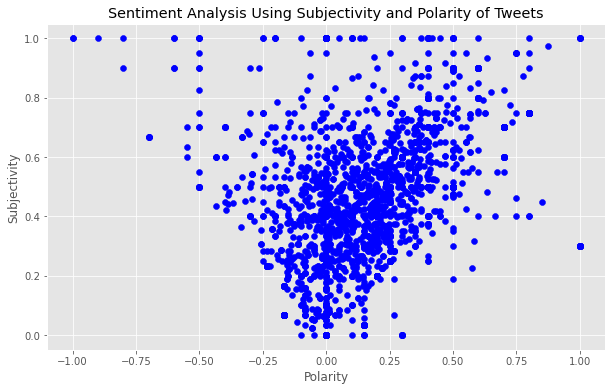

In [32]:
fig = plt.figure(figsize=(10,6))
for i in range(0, text_df.shape[0]):
    plt.scatter(text_df['polarity'][i],text_df['subjectivity'][i], color = 'Blue')

plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Sentiment Analysis Using Subjectivity and Polarity of Tweets')
plt.savefig('Sentiment Analysis Using Subjectivity and Polarity of Tweets')    
plt.show()

PLOTTING THE COUNTS AND DISTRIBUTION OF THE SENTIMENTS OF THE TWEETS

In [33]:
text_df['sentiment'].value_counts()

Positive    1825
Neutral      840
Negative     508
Name: sentiment, dtype: int64

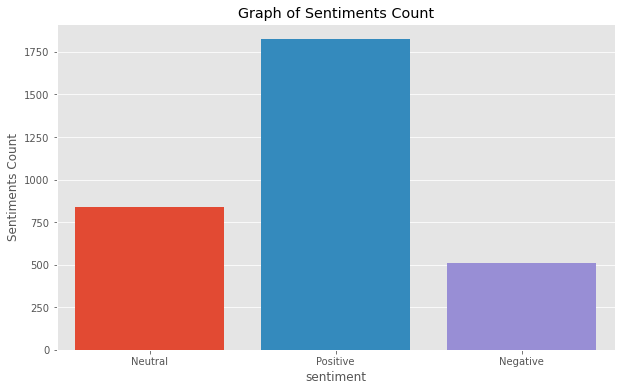

In [34]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='sentiment', data = text_df, saturation = 3)
plt.ylabel('Sentiments Count')
plt.title('Graph of Sentiments Count')
plt.savefig('Graph of Sentiments Count.png')

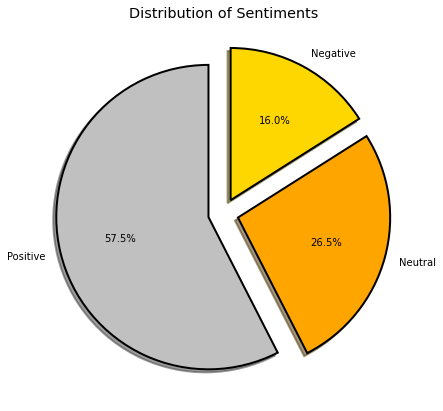

In [35]:
fig = plt.figure(figsize=(7,7))
colors = ("silver", "orange", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of Sentiments')
plt.show()

WORD CLOUDS - CREATION OF WORD CLOUDS FOR THE POSITIVE, NEUTRAL AND NEGATIVE TWEETS IN THE DATA

In [36]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Date,User,Source,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,polarity,subjectivity,sentiment
1153,1970,EcigClick,Buffer,UK,uks stoptober 2019 embraces vaping best way qu...,2,0,0,0,1.0,0.3,Positive
100,1970,gillianegolden,Twitter for Android,"Irish, in Westminster.",would point uk dental professionals wellconsid...,2,0,0,0,1.0,0.3,Positive
2486,1970,Shoutout_UK,TweetDeck,London,best vape tricks try ecigarettes smoking vaping,0,0,0,0,1.0,0.3,Positive
1658,1970,mihotep,Twitter for Android,2020 top #tobacco influencer,jonungoedthomas phe_uk excellent news teens pr...,2,1,0,0,1.0,1.0,Positive
1479,1970,Nofanpg,Twitter Web Client,"Lagos, Nigeria",uk get best cbd product vape product smoking p...,0,0,0,0,1.0,0.3,Positive


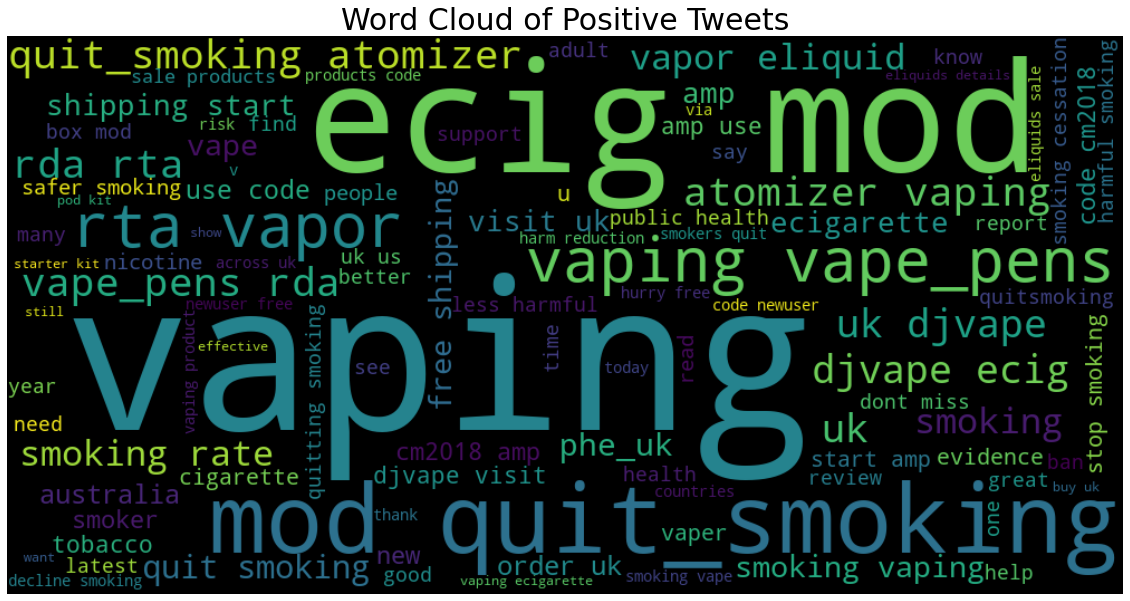

In [41]:
Tweet = ' '.join([word for word in pos_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=100, width=1000, height=500).generate(Tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Positive Tweets', fontsize=30)
plt.savefig('Word Cloud of positive tweets.png')
plt.show()

In [42]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Date,User,Source,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,polarity,subjectivity,sentiment
156,1970,VapinSquirrel,Twitter Web App,"Calgary, Alberta",uk educate smokers benefits vaping cafreeland ...,12,4,0,0,-0.000284,0.338636,Negative
606,1970,vapers_alliance,eClincher,NaN,vaping proven 95 less harmful smoking high tim...,4,3,0,0,-0.001667,0.418333,Negative
1421,1970,JMarkD50,Twitter for iPhone,Twickenham,robertjwest uk public health deserves huge cre...,1,0,0,0,-0.002778,0.522222,Negative
621,1970,vapeclub,Hootsuite Inc.,"Watford, England",new press release phe_uk reiterates reduction ...,3,0,0,0,-0.003247,0.405844,Negative
910,1970,TheIBVTA,Twitter for Android,"England, Scotland, Wales, NI",many publichealth experts uk believe witnessin...,57,38,4,1,-0.004167,0.550000,Negative


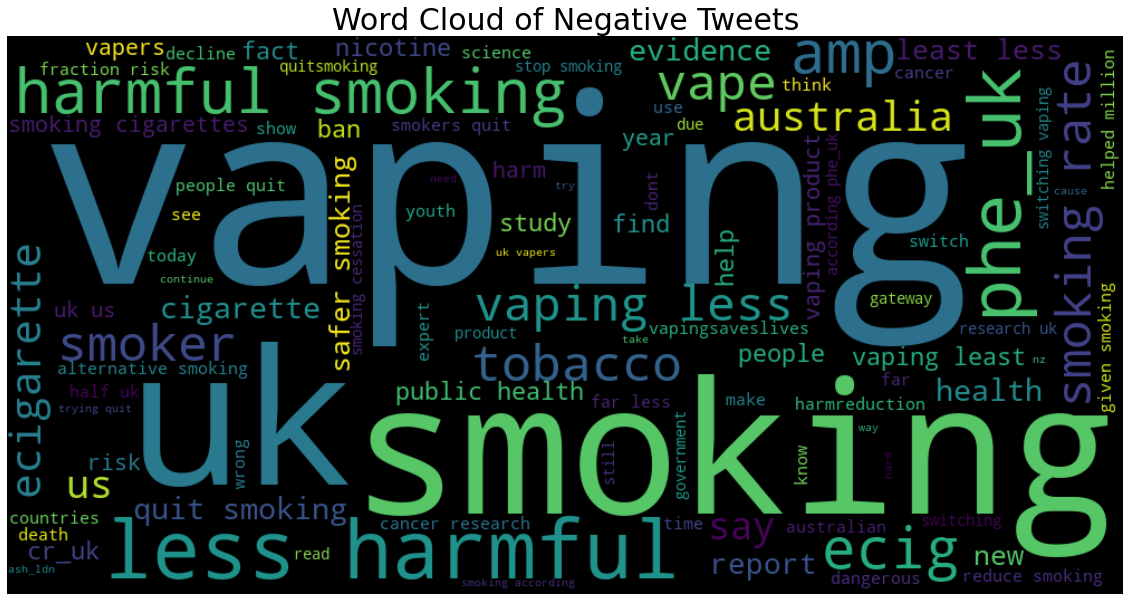

In [43]:
Tweet = ' '.join([word for word in neg_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=100, width=1000, height=500).generate(Tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Negative Tweets', fontsize=30)
plt.savefig('Word Cloud of negative tweets.png')
plt.show()

In [44]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Date,User,Source,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,polarity,subjectivity,sentiment
0,1970,ColinMendelsohn,Twitter Web App,"Sydney, Australia",7 things need know quitting smoking vaping jhb...,26,13,1,0,0.0,0.0,Neutral
2678,1970,liteupsuk,Hootsuite,NaN,menthol flavour eliquid 495 liteups uk vaping ...,0,0,0,0,0.0,0.0,Neutral
2640,1970,CehNehDeh,Twitter for Android,Oklahoma,evantitobacco critical difference smoking vs v...,0,0,0,0,0.0,0.8,Neutral
2641,1970,grannylouisa,Twitter for iPad,NaN,ive touched personal messages ive us applaudin...,40,13,2,2,0.0,0.3,Neutral
2642,1970,expertvaping,Buffer,WorldWide,uk health officials embrace vaping amp smoking...,8,5,0,0,0.0,0.0,Neutral


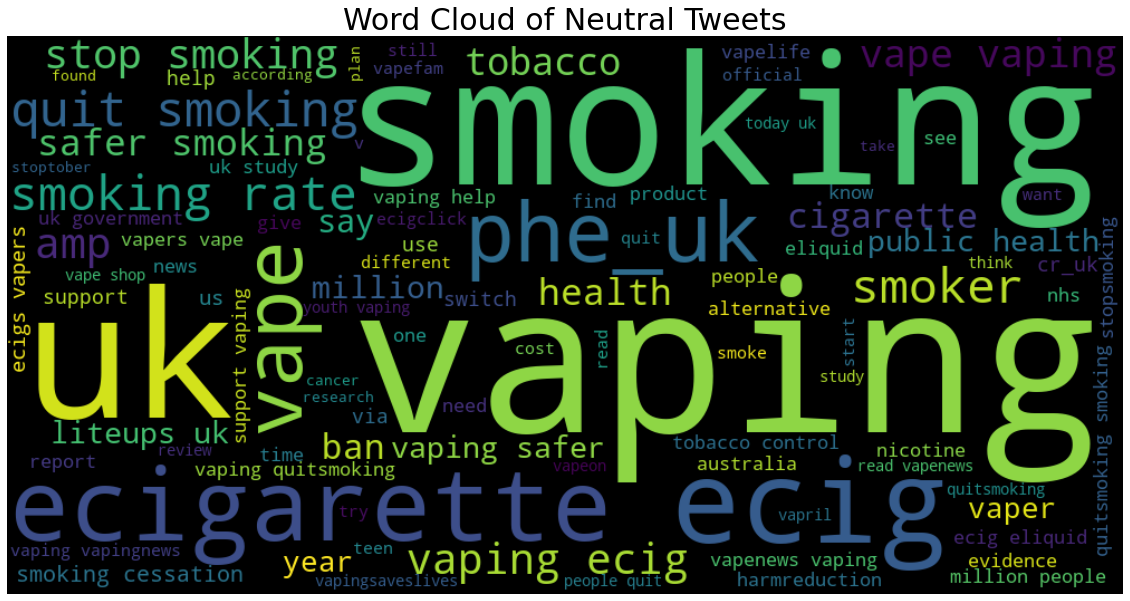

In [45]:
Tweet = ' '.join([word for word in neutral_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=100, width=1000, height=500).generate(Tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Neutral Tweets', fontsize=30)
plt.savefig('Word Cloud of neutral tweets.png')
plt.show()

In [46]:
df.columns

Index(['Unnamed: 0', 'Date', 'TweetURL', 'User', 'Source', 'Location', 'Tweet',
       'Likes_Count', 'Retweet_Count', 'Quote_Count', 'Reply_Count', 'year'],
      dtype='object')

COUNTING THE ENGAGEMENTS ON THE TWEET

In [47]:
tweet_count = len(df)
likes_count = df['Likes_Count'].sum()
retweet_count = df['Retweet_Count'].sum()
print('Number of tweets: ' + str(tweet_count))
print('Total number of likes: ' + str(likes_count))
print('Total number of retweets: '+ str(retweet_count))


Number of tweets: 3173
Total number of likes: 15601
Total number of retweets: 9181


VIEWING AND PREDICTING MOST PROBABLE WORDS THAT FOLLOW THE SEQUENCE OF THE MOST FREQUENT WORDS/ALPHABETS

In [48]:
countVectorizer = CountVectorizer(analyzer=data_processing) 
countVector = countVectorizer.fit_transform(text_df['Tweet'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))


count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

3173 Number of reviews has 48 words


C:\Users\Dr Oluwaseun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,0,1,2,3,4,5,6,7,8,...,á,ä,é,ö,ü,ד,ך,ר,ツ,ー
0,17,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,26,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
e,41224
i,32850
a,31909
s,28616
n,27068
t,24608
o,23288
r,21635
p,18029
g,17184


In [49]:
def frequent_words(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]

n2_bigrams = frequent_words(text_df['Tweet'],(2,2),20)
n2_bigrams

[('smoking rates', 354),
 ('ecig mod', 347),
 ('mod quit_smoking', 347),
 ('vaping vape_pens', 346),
 ('rta vapor', 346),
 ('quit_smoking atomizer', 344),
 ('atomizer vaping', 344),
 ('vape_pens rda', 344),
 ('rda rta', 344),
 ('uk djvape', 326),
 ('djvape ecig', 326),
 ('quit smoking', 321),
 ('smoking vaping', 312),
 ('vapor eliquids', 216),
 ('vaping smoking', 212),
 ('harmful smoking', 179),
 ('free shipping', 175),
 ('stop smoking', 166),
 ('safer smoking', 165),
 ('visit uk', 163)]

In [50]:
freq_words_df = pd.DataFrame(n2_bigrams, columns=['Words', 'Frequency'])
freq_words_df

,Words,Frequency
0,smoking rates,354
1,ecig mod,347
2,mod quit_smoking,347
3,vaping vape_pens,346
4,rta vapor,346
5,quit_smoking atomizer,344
6,atomizer vaping,344
7,vape_pens rda,344
8,rda rta,344
9,uk djvape,326


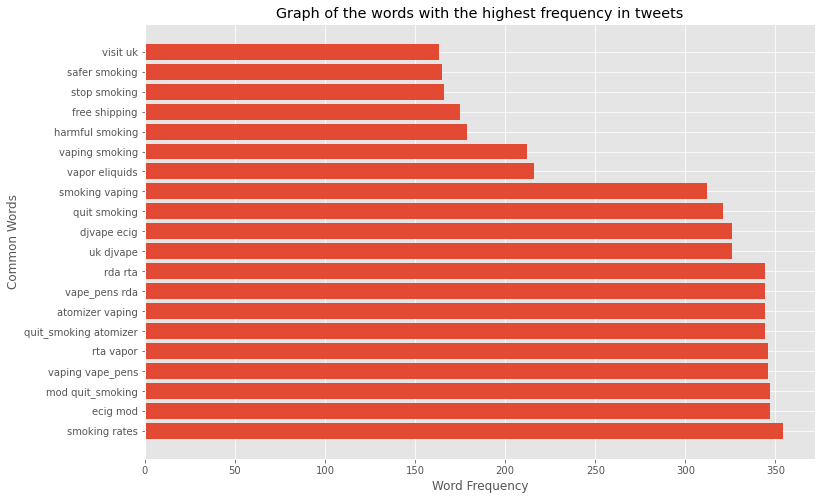

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(freq_words_df['Words'], freq_words_df['Frequency'])
labels = ax.get_xticklabels()
ax.set(xlabel='Word Frequency', ylabel='Common Words',title='Graph of the words with the highest frequency in tweets')
plt.savefig('Word with highest frequency2.jpeg')
plt.show()

In [54]:
more_freq_words_df = frequent_words(text_df['Tweet'],(3,3),20)
more_freq_words_df

[('ecig mod quit_smoking', 347),
 ('mod quit_smoking atomizer', 344),
 ('quit_smoking atomizer vaping', 344),
 ('vaping vape_pens rda', 344),
 ('vape_pens rda rta', 344),
 ('rda rta vapor', 344),
 ('atomizer vaping vape_pens', 343),
 ('uk djvape ecig', 326),
 ('djvape ecig mod', 326),
 ('rta vapor eliquids', 216),
 ('free shipping start', 160),
 ('shipping start 50', 159),
 ('visit uk djvape', 157),
 ('order uk djvape', 117),
 ('use code cm2018', 106),
 ('code cm2018 amp', 105),
 ('djvape visit uk', 99),
 ('amp use code', 97),
 ('start 50 amp', 83),
 ('50 amp use', 83)]